In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import itertools
import matplotlib.pyplot as plt
import PIL

%matplotlib inline

In [ ]:
train_path='/content/drive/My Drive/all/train'
valid_path='/content/drive/My Drive/all/valid'

In [ ]:
#classes=['Corn(maize) Common rust','Corn(maize) healthy','Corn(maize) Northern Leaf Blight','Potato Early blight','Potato healthy', 'Potato Late blight','Tomato healthy', 'Tomato Late blight','Tomato Yellow Leaf Curl Virus', 'Undefined]

In [ ]:
train_batches= ImageDataGenerator(featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=90,
        horizontal_flip=True).flow_from_directory(train_path, target_size=(224,224), classes=['Cherry Powdery mildew','Corn(maize) Common rust','Corn(maize) healthy','Corn(maize) Northern Leaf Blight','Potato Early blight','Potato healthy', 'Potato Late blight','Squash Powdery mildew','Tomato healthy', 'Tomato Late blight','Tomato Yellow Leaf Curl Virus', 'Undefined'], batch_size=20)
valid_batches= ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['Cherry Powdery mildew','Corn(maize) Common rust','Corn(maize) healthy','Corn(maize) Northern Leaf Blight','Potato Early blight','Potato healthy', 'Potato Late blight','Squash Powdery mildew','Tomato healthy', 'Tomato Late blight','Tomato Yellow Leaf Curl Virus', 'Undefined'], batch_size=20)

Found 8698 images belonging to 12 classes.
Found 3284 images belonging to 12 classes.


In [ ]:
k.clear_session()
vgg16_model= tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 21s 0us/step


In [ ]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)


In [ ]:
for layer in model.layers:
    layer.trainable = False


In [ ]:
model.add(tf.keras.layers.Dense(512,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
model.add(tf.keras.layers.Dense(12, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
#model = tf.keras.models.load_model('/content/drive/My Drive/best_model.h5')

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/My Drive/best_model_paper.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')  
es = EarlyStopping(monitor="val_loss",patience=50,verbose=1, mode="min")
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

# Train model
history = model.fit(train_batches,steps_per_epoch=200,
                   validation_data=valid_batches,validation_steps=100, callbacks = [checkpoint, es], epochs=300,verbose=1)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/300
200/200 [==============================] - ETA: 0s - loss: 0.7084 - acc: 0.8189
Epoch 00001: val_acc improved from -inf to 0.89950, saving model to /content/drive/My Drive/best_model_paper.h5
200/200 [==============================] - 1569s 8s/step - loss: 0.7084 - acc: 0.8189 - val_loss: 0.2815 - val_acc: 0.8995
Epoch 2/300
200/200 [==============================] - ETA: 0s - loss: 0.3134 - acc: 0.8927
Epoch 00002: val_acc did not improve from 0.89950
200/200 [==============================] - 800s 4s/step - loss: 0.3134 - acc: 0.8927 - val_loss: 0.4190 - val_acc: 0.8850
Epoch 3/300
200/200 [==============================] - ETA: 0s - loss: 0.2674 - acc: 0.9112
Epoch 00003: val_acc improved from 0.89950 to 0.94700, saving model to /content/drive/My Drive/best_model_paper.h5
200/200 [==============================] - 418s 2s/step - loss: 0.2674 - acc: 0.9112 - val_loss: 0.1772 - val_acc: 0.9470
Epoch 4/300
200/200 [==============================] - ETA: 0s - loss: 0.2460 - 

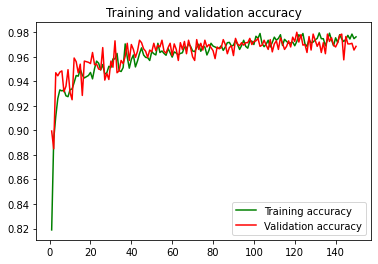

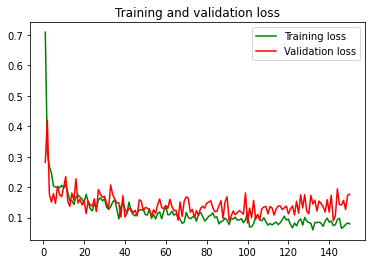

In [ ]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#import tensorflow as tf
#model = tf.keras.models.load_model('/content/drive/My Drive/VGG/best_model.h5')

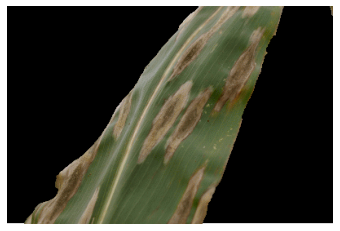

The disease is...Corn(maize) Northern Leaf Blight


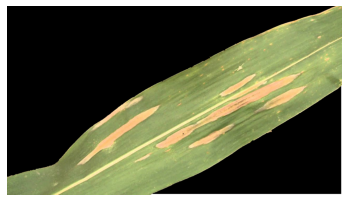

The disease is...Corn(maize) Common rust


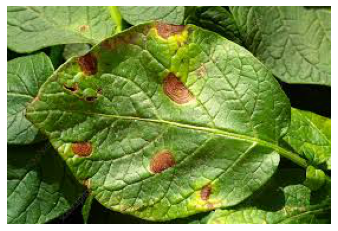

The disease is...Potato Early blight


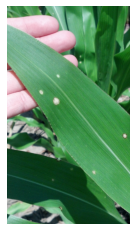

The disease is...Corn(maize) Northern Leaf Blight


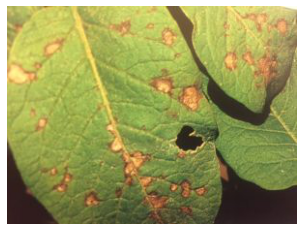

The disease is...Potato healthy


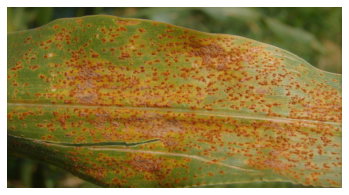

The disease is...Corn(maize) Common rust


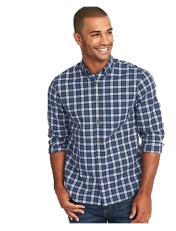

The disease is...Undefined


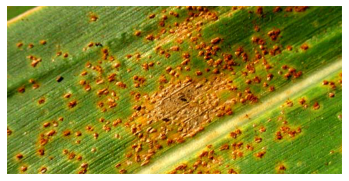

The disease is...Corn(maize) Common rust


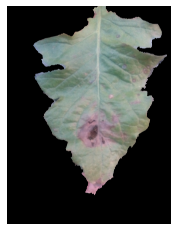

The disease is...Tomato Late blight


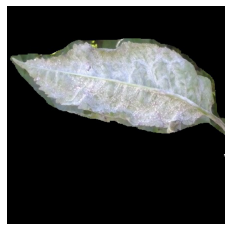

The disease is...Cherry Powdery mildew


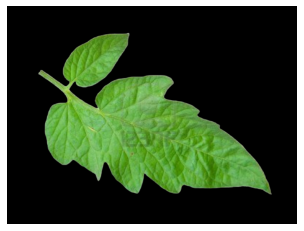

The disease is...Tomato healthy


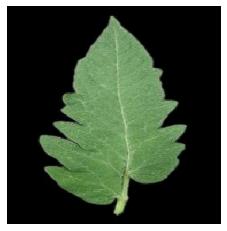

The disease is...Tomato healthy


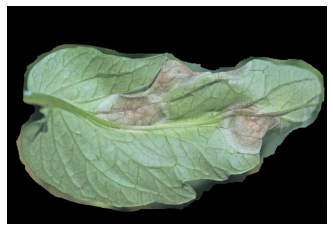

The disease is...Tomato Late blight


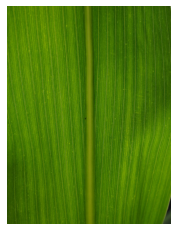

The disease is...Corn(maize) healthy


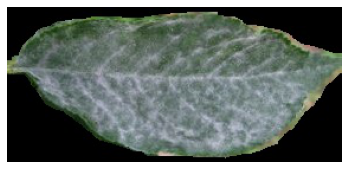

The disease is...Cherry Powdery mildew


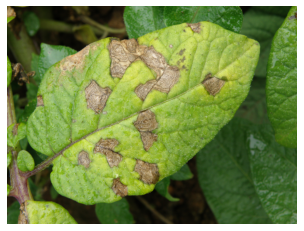

The disease is...Squash Powdery mildew


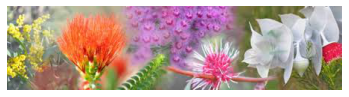

The disease is...Undefined


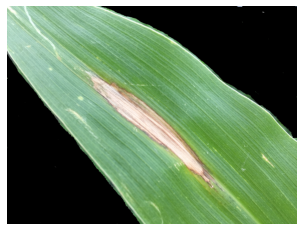

The disease is...Corn(maize) Common rust


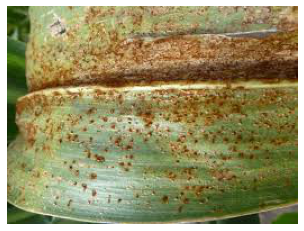

The disease is...Corn(maize) Common rust


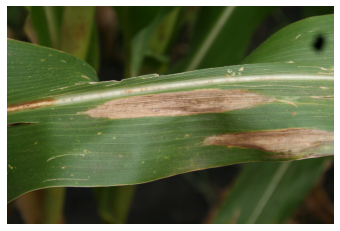

The disease is...Corn(maize) Common rust


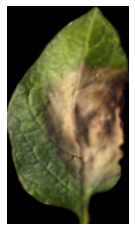

The disease is...Potato Late blight


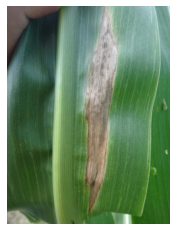

The disease is...Corn(maize) healthy


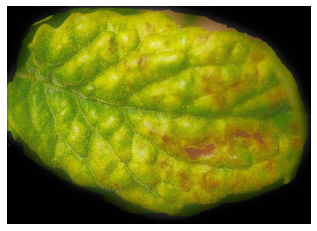

The disease is...Tomato Yellow Leaf Curl Virus


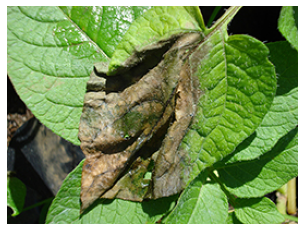

The disease is...Tomato Late blight


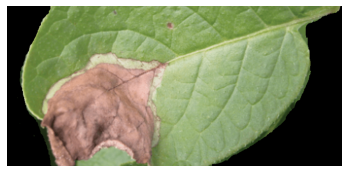

The disease is...Potato healthy


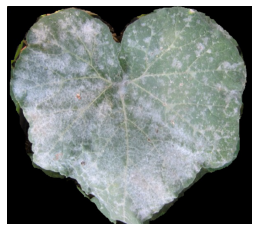

The disease is...Squash Powdery mildew


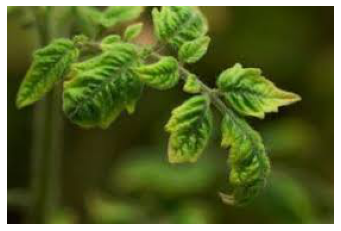

The disease is...Tomato Late blight


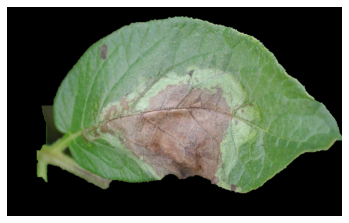

The disease is...Potato Late blight


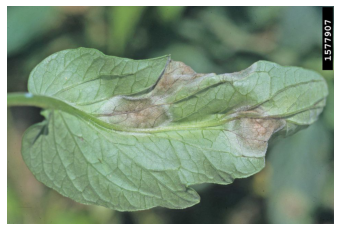

The disease is...Corn(maize) Common rust


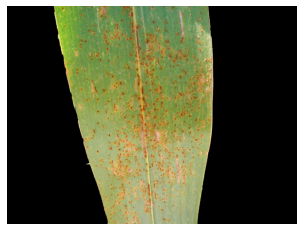

The disease is...Corn(maize) Common rust


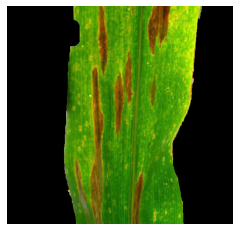

The disease is...Corn(maize) Common rust


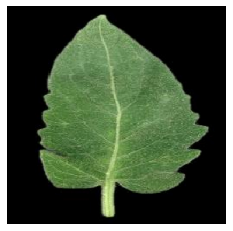

The disease is...Tomato healthy


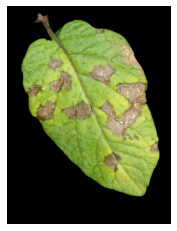

The disease is...Potato Early blight


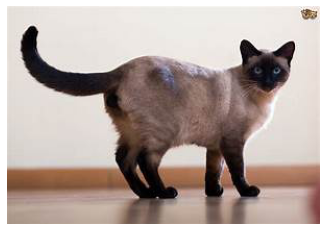

The disease is...Undefined


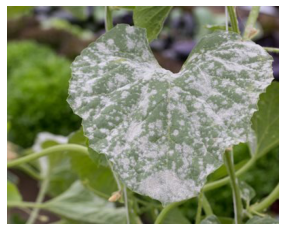

The disease is...Tomato Late blight


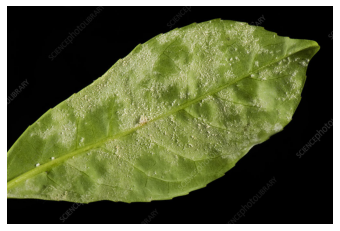

The disease is...Cherry Powdery mildew


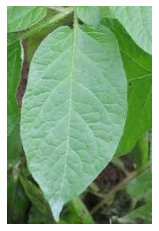

The disease is...Potato healthy


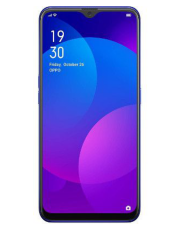

The disease is...Undefined


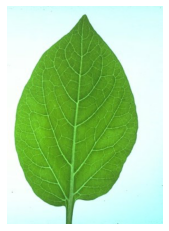

The disease is...Potato healthy


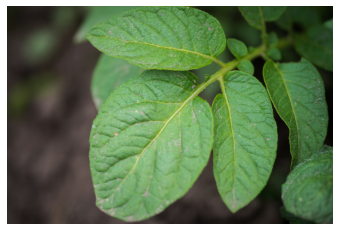

The disease is...Potato healthy


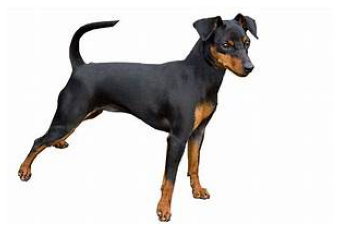

The disease is...Undefined


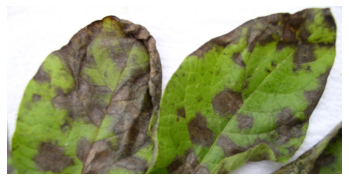

The disease is...Corn(maize) Common rust


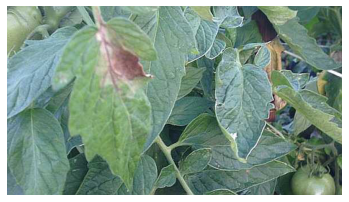

The disease is...Tomato Late blight


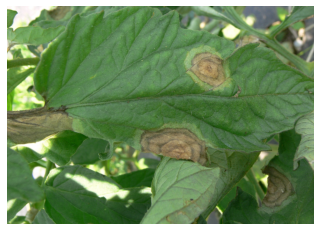

The disease is...Tomato Late blight


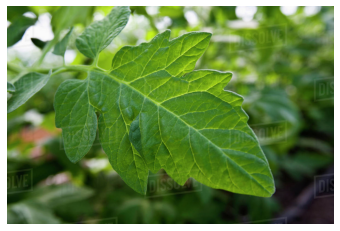

The disease is...Tomato Late blight


In [ ]:
#Prediction 

import random
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

def prediction(img_path):
    org_img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    #img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()
    
    # Make prediction
    prediction = model.predict(img_tensor)

        
    classes = ['Cherry Powdery mildew','Corn(maize) Common rust','Corn(maize) healthy','Corn(maize) Northern Leaf Blight','Potato Early blight','Potato healthy', 'Potato Late blight','Squash Powdery mildew','Tomato healthy', 'Tomato Late blight','Tomato Yellow Leaf Curl Virus', 'Undefined']
    print("The disease is..."+str(classes[np.argmax(np.array(prediction[0]))]))

pred_dir = '/content/drive/My Drive/test/'
#pred_dir = '/content/s/'
pred_files = random.sample(os.listdir(pred_dir),45)
for f in pred_files:
    prediction(pred_dir+f)

In [ ]:
model.save('/content/drive/My Drive/Pomatochesquacorn4.h5')